In [2]:
import pandas as pd
import numpy as np
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# SMA  (SIMPLE MOVING AVERAGE) Promedio Movil Simple

In [14]:
#Guardamos una nueva columna, llamamos a la columna que tenemos, y aplicamos rolling
#Que permite seleccionar el periodo o conjunto de periodos y el window es una ventana temporal
airline['3-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 3).mean()
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

In [15]:
airline.head(12)

,Thousands of Passengers,6-month-SMA,12-month-SMA,3-month-SMA
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,120.666667
1949-04-01,129,NaN,NaN,126.333333
1949-05-01,121,NaN,NaN,127.333333
1949-06-01,135,124.500000,NaN,128.333333
1949-07-01,148,130.500000,NaN,134.666667
1949-08-01,148,135.500000,NaN,143.666667
1949-09-01,136,136.166667,NaN,144.000000


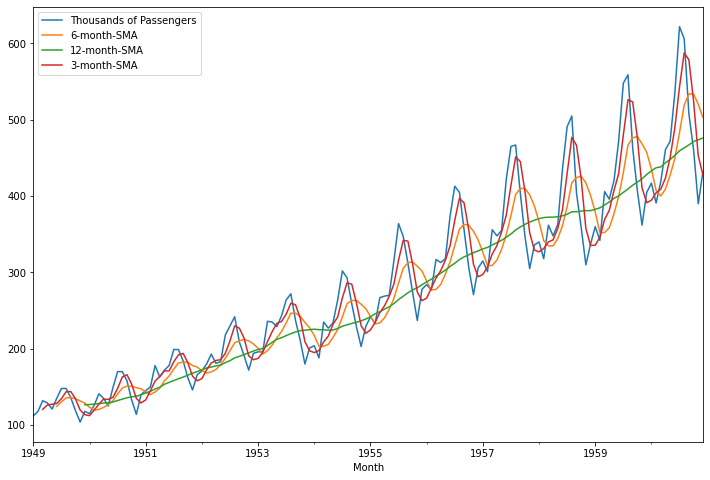

In [16]:
airline.plot(figsize = (12,8))

# EWMA  = Exponentially Weighted Moving Average
# Promedio movil ponderado exponencial

In [18]:
#Creamos una nueva columna, pasamos el parametro ewm y le damos al span los numeros de meses
#el adjust = False para poder calcular de manera diferente el valor de alpha 
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span = 12, adjust = False).mean()

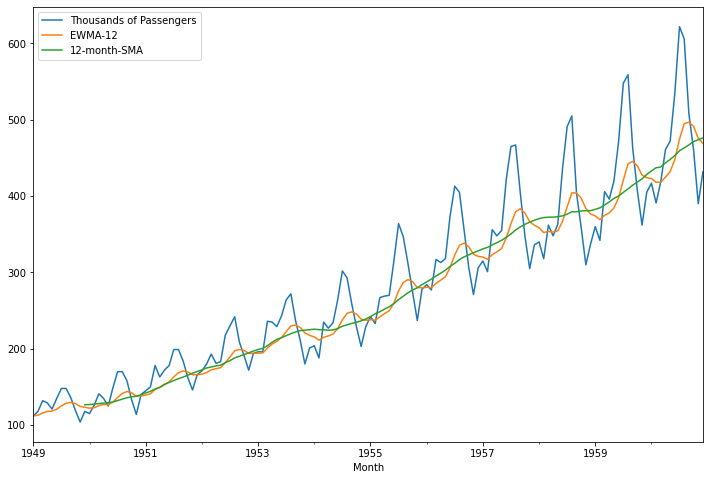

In [19]:
airline[['Thousands of Passengers', 'EWMA-12', '12-month-SMA']].plot(figsize = (12,8))

In [20]:
airline.head(5)

,Thousands of Passengers,6-month-SMA,12-month-SMA,3-month-SMA,EWMA-12
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,120.666667,115.857988
1949-04-01,129,NaN,NaN,126.333333,117.879836
1949-05-01,121,NaN,NaN,127.333333,118.359861
